In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv")

In [ ]:
diabetes.head()

##### Data Wrangling
* Is there any missing data

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df = diabetes.drop(['Pregnancies','Outcome'], axis = 1)

In [ ]:
diabetes_df.replace(0, np.nan, inplace = True)

In [ ]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

##### Handling Missing Data

In [ ]:
np.round(diabetes_df['Insulin'].mean())

In [ ]:
diabetes_df['Insulin'].fillna(np.round(diabetes_df['Insulin'].mean()),inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')

In [ ]:
impute.fit(diabetes_df)

SimpleImputer(strategy='median')

In [ ]:
impute.transform(diabetes_df)

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_array = impute.transform(diabetes_df)

In [ ]:
diabetes_df1 = pd.DataFrame(diabetes_array, columns = diabetes_df.columns)

In [ ]:
diabetes_df1['Pregnancies'] = diabetes.Pregnancies
diabetes_df1['Outcome'] = diabetes.Outcome

##### Is there any multicollinearity ?

In [ ]:
plt.figure(figsize = (14,8))
sns.heatmap(diabetes_df1.corr(),annot = True ,cmap = 'RdYlGn')

##### Features & Target

In [ ]:
X = diabetes_df1.drop(['Outcome'],axis = 1)
Y = diabetes_df1['Outcome']

##### Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

##### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
#solver = 'shape of descision boundry'
#c = how strong your decision boundry will be decided by value of c
logit_model = LogisticRegression(max_iter = 100000, solver = 'liblinear',C= 100)
logit_model.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=100000, solver='liblinear')

In [ ]:
logit_model.score(x_train,y_train)

0.7654723127035831

#### Classification Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = logit_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[97, 10],
       [19, 28]])

<Axes: >

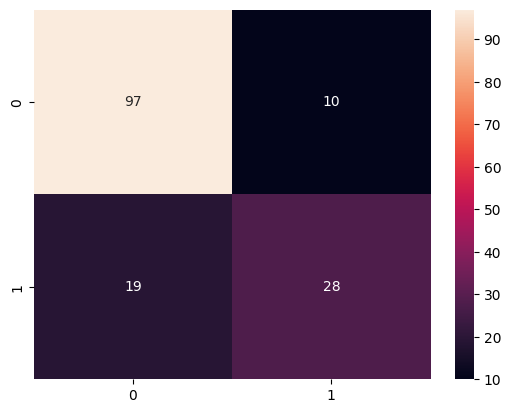

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot = True)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

